#Understanding Hadoop and Mahoot in Big Data Context

###1. Introduction

In this report, we are using MapReduce programming model and Mahout on the Hadoop cluster to process  the weather dataset and a collection of text documents.

Hadoop is an open-source framework that stores and processes huge volumes of data,  within a group of interconnected nodes to perform complex analyses that would be hard to be handled by a single machine. These interconnected nodes form a distributed computing environment known as the Hadoop cluster. These complex analyses are done on the Hadoop cluster with the help of MapReduce.  

MapReduce is a programming model that processes and analyzes big data in Hadoop distributed environment by breaking down the processing tasks into two phases, Map and Reduce phases. The Map phase reads the input and then outputs intermediate key-value pairs which are passed as inputs to the Reduce process after being sorted and shuffled. The Reduce process aggregates the values for each unique key, producing the final output of the MapReduce job.

In the first question requested, we have implemented our mappers and reducers in Python to find some descriptive statistics using a weather dataset that is hourly recorded in April 2007.

In the second part of our report, we implemented the K-Means clustering algorithm using Mahout on Hadoop. Mahout is a higher-level library that runs on top of Hadoop, providing scalable, distributed machine learning algorithms for data analysis tasks that can efficiently process large datasets stored in Hadoop such as the K-Means clustering algorithm. We used the Mahout K-Means clustering algorithm to analyze a collection of documents using Euclidean, Manhattan, and Cosine distance measures.

###2. Dataset


Regarding the first question, our dataset consists of four files, each file represents a month in 2007 starting from April to July. In our report, we have chosen the April weather dataset to collect descriptive statistics about. Each record represents an hour for each day in April across different weather stations capturing the weather conditions.

In this section, we will focus on describing the features that we will apply to them the descriptive statistics:  

* *Year Month Day*: represents the date in the format "YYYYMMMDD" for the current station starting from April 1, 2007
* *Dry Bulb Temp*: represents the air temperature of the station without considering the moisture in the air and it's measured in degrees Celsius (°C)  
* *Dew Point Temp*: represents the temperature at which air becomes saturated with moisture and dew starts to form and it's measured in degrees Celsius (°C)
* *Relative Humidity*:represents the amount of moisture present in the air relative to the maximum amount of moisture the air could hold at the same temperature and it's expressed as a percentage (%)
* *Wind Speed*: represents the speed or velocity of air movement horizontally relative to the Earth's surface and it's measured in knots (kt)

###3. Implementation

####3.1 Question 1:

In the first question, a lot of our code is reused to satisfy the values we are calculating. Our mappers all take the same format except for a change in the name of the variable needed that is being processed. The mapper takes the format where it takes the input the dataset and then produces key-value pairs where the key represents the "Year Month Day" column and the value represents the actual values of the variable being calculated (Wind Speed, Relative Humidity, Dew Point Temp) for the first three sub-questions and for the last sub-question we extract all three variables (Dry Bulb Temp, Relative Humidity, and Wind Speed) for processing the pseudo-code used for the first three sub-questions is:

  
        Read header from standard input
        Split the header by comma as a delimiter
        Extract 'Variable Name' column index
        For each line in standard input:
            Split the line by comma as a delimiter
            Check if the line has the expected number of columns:
                Extract 'Date' and 'Variable Name' values //Variable Name is either (Wind Speed, Relative Humidity, Dew Point Temp) depending on the sub-question)
                If 'Variable Name' value is valid (not empty or '-'):
                    Merge 'Variable Name' sub-values
                    Convert 'Variable Name' sub-values to integer
                    Print 'Date' and 'Variable Name' as key-value pair

The merging step has arisen because sometimes the wind speed values are tab-separated, i.e., ('5$\;\;\;\;\;\;\;$3'). This step is done in all our mappers within this report.


####3.1.1 Difference between the maximum and the minimum Wind Speed:

In the first question, we are requested to find some descriptive statistics using some weather variables that are hourly recorded for several stations. We will start by finding the difference between the maximum and the minimum “Wind Speed” from all of the weather stations for each day in the month. Below we will find the pseudo-code of our mapper that takes as input our April weather dataset (200704hourly.txt) and then produces key-value pairs where the key represents the "Year Month Day" column and the value represents the actual values of the "Wind Speed" column as stated previously.
  
The reducer then receives sorted key-value pairs as input and then produces key-value pairs as well where the key represents the date and the value represents the difference between the maximum and the minimum.

Below is the reducer's pseudo code:


        Initialize variables: current_date, min_wind_speed = infinity, max_wind_speed = negative infinity

        For each line in standard input:
            Split the line by tab as a delimiter
            Extract 'Date' and 'Wind Speed' values
            Convert 'Wind Speed' to an integer

            If current_date is None:
                Set current_date to the extracted date

            If current_date is different from the extracted date:
                Print the date as a key and the difference between max_wind_speed and min_wind_speed for the previous date as a value

                Reset current_date, min_wind_speed, and max_wind_speed for the new date

            Update min_wind_speed and max_wind_speed with the extracted wind_speed

        Print the date as a key and difference between max_wind_speed and min_wind_speed as a value for the last date


If the mapper and reducer files are located on the local cluster (i.e.: Lena), you can copy them to the Hadoop cluster using the following command:

          hadoop fs -copyFromLocal mapper.py  ./CW1/Q1/Q1Bullet1
          hadoop fs -copyFromLocal reducer.py  ./CW1/Q1/Q1Bullet1


You can execute the mapper and reducer files using the following command:

      hadoop jar /opt/hadoop/current/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar -file mapper.py -mapper mapper.py -file reducer.py -reducer reducer.py -input CW1/Q1/200704hourly.txt  -output CW1/Q1/Q1Bullet1/output1


Although Hadoop is natively written in Java, the Hadoop streaming job allows us to use MapReduce with any programming language that can read from standard input and write to standard output. In our case, our scripts are written in Python to process the data in the Hadoop cluster. The input is our April dataset and the output is a folder placed in the above directory on the Hadoop cluster. We have checked the output using:

      hadoop fs -cat ./CW1/Q1/Q1Bullet1/output1/part-00000

Here is the output:

In [ ]:
import pandas as pd
bullet1 = '/content/part1-00000.csv'
df = pd.read_csv(bullet1)
df=pd.DataFrame(df)
display(df)

,Date,Max_Min_Difference
0,20070401,43
1,20070402,56
2,20070403,40
3,20070404,96
4,20070405,42
5,20070406,41
6,20070407,43
7,20070408,64
8,20070409,71
9,20070410,57


####3.1.2 Daily minimum Relative Humidity:

Secondly, we will find the daily minimum “Relative Humidity” from all of the weather stations. The mapper produces key-value pairs where the key represents the "Year Month Day" column and the value represents the actual values of the "Relative Humidity" column using the same April weather dataset (200704hourly.txt). We use the previously discussed mapper pseudo code

The reducer then receives sorted key-value pairs as input then produces key-value pairs as well where the key represents the date and the value represents the daily minimum Relative Humidity.

  Below is the reducer's pseudo code:

      Initialize variables: current_date, min_relative_humidity = infinity

      For each line in standard input:
          Split the line by tab as a delimiter
          Extract 'Date' and 'Relative Humidity' values
          Convert 'Relative Humidity' to an integer

          If current_date is None:
              Set current_date to the extracted date

          If current_date is different from the extracted date:
              Print the date as a key and the minimum relative_humidity for the previous date as a value

              Reset current_date and min_relative_humidity for the new date

          Update min_relative_humidity with the extracted relative_humidity

      Print the date and minimum relative_humidity for the last date


If the mapper and reducer files are located on the local cluster (i.e.: Lena), you can copy them to the Hadoop cluster using the following command:

          hadoop fs -copyFromLocal mapper.py  ./CW1/Q1/Q1Bullet2
          hadoop fs -copyFromLocal reducer.py  ./CW1/Q1/Q1Bullet2



You can execute the mapper and reducer files using the following command:

      hadoop jar /opt/hadoop/current/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar -file mapper.py -mapper mapper.py -file reducer.py -reducer reducer.py -input CW1/Q1/200704hourly.txt  -output CW1/Q1/Q1Bullet2/output2


The input is our April dataset and output is a folder placed in the above directory on Hadoop cluster. We have checked the output using:

      hadoop fs -cat ./CW1/Q1/Q1Bullet2/output2/part-00000

Here is the output:

In [ ]:
import pandas as pd
bullet2 = '/content/part2-00000.csv'
df = pd.read_csv(bullet2)
df=pd.DataFrame(df)
display(df)

,Date,Daily_Min
0,20070401,4
1,20070402,5
2,20070403,4
3,20070404,3
4,20070405,2
5,20070406,4
6,20070407,6
7,20070408,2
8,20070409,4
9,20070410,4


####3.1.3 Daily mean and variance of Dew Point Temp:

The third request is to find the daily mean and variance of “Dew Point Temp” from all of the weather stations. The mapper produces key-value pairs where the key represents the "Year Month Day" column and the value represents the actual values of the "Dew Point Temp" column using the same April weather dataset (200704hourly.txt). We again use the discussed mapper pseudo-code where our variable of focus is “Dew Point Temp”:

The reducer then receives sorted key-value pairs as input and then produces key-value pairs as well where the key represents the date and the value is a compound value that consists of the mean and variance of Dew Point Temp.

  Below is the reducer's pseudo code:


      Initialize variables: current_date, total_dew_point_temp, total_squared_dew_point_temp, count = 0

      For each line in standard input:
          Split the line by tab as a delimiter
          Extract 'Date' and 'Dew Point Temp' values
          Convert 'Dew Point Temp' to float

          If current_date is None:
              Set current_date to the extracted date

          If current_date is different from the extracted date:
              Calculate average and variance for the current date
              Print date as a key, average and variance as value for the previous date

              Reset variables for the new date

          Update total_dew_point_temp, count, and total_squared_dew_point_temp for the current date

      Calculate and output the average and variance for the last date


The rule used to calculate the variance is as follows:

$$ variance= \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n} $$

where $\mu$ is the mean, $x_i$ is the $i^{th}$ observation and $n$ is the number of observations.

If the mapper and reducer files are located on the local cluster (i.e.: Lena), you can copy them to the Hadoop cluster using the following command:

          hadoop fs -copyFromLocal mapper.py  ./CW1/Q1/Q1Bullet3
          hadoop fs -copyFromLocal reducer.py  ./CW1/Q1/Q1Bullet3


You can execute the mapper and reducer files using the following command:

      hadoop jar /opt/hadoop/current/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar -file mapper.py -mapper mapper.py -file reducer.py -reducer reducer.py -input CW1/Q1/200704hourly.txt  -output CW1/Q1/Q1Bullet3/output3

 The input is our April dataset and output is a folder placed in the above directory on Hadoop cluster. We have checked the output using:  

      hadoop fs -cat ./CW1/Q1/Q1Bullet3/output3/part-00000

Here is the output:

In [ ]:
import pandas as pd
bullet3 = '/content/part3-00000.csv'
df = pd.read_csv(bullet3)
df=pd.DataFrame(df)
display(df)

,Date,Mean,Variance
0,20070401,40.987516,215.233868
1,20070402,41.862239,233.565018
2,20070403,40.305128,299.511984
3,20070404,32.513196,265.112657
4,20070405,26.104738,197.583594
5,20070406,23.827006,212.593617
6,20070407,21.949284,197.189800
7,20070408,24.169914,173.692490
8,20070409,28.255512,172.363984
9,20070410,31.409166,225.148671


####3.1.4 Correlation matrix between Relative Humidity, Wind Speed and Dry Bulb Temp

At last, we will find the correlation matrix that describes the monthly correlation among “Relative Humidity”, “Wind Speed” and “Dry Bulb Temp” from all of the weather stations. The mapper produces key-value pairs where the key represents the "Year Month Day" column and the value is a compound value that consists of "Dry Bulb Temp", "Relative Humidity" and "Wind Speed" values using the same April weather dataset (200704hourly.txt). Below is the mapper's pseudo code which incorporates three variables:


      Read the header from standard input
      Split the header by comma as a delimiter
      Extract the indices of 'Dry Bulb Temp', 'Relative Humidity', and 'Wind Speed' columns
      For each line in standard input:
          Split the line by comma as a delimiter
          Check if the line has the expected number of columns:
              Extract 'Date', 'Dry Bulb Temp', 'Relative Humidity', and 'Wind Speed' values
              Check if all the values are valid (not empty or '-'):
                Merge 'Dry Bulb Temp', 'Relative Humidity', and 'Wind Speed' sub-values
                Convert sub-values to floats
                Print 'Date', 'Dry Bulb Temp', 'Relative Humidity', and 'Wind Speed' as key-value pairs

The reducer then receives sorted key-value pairs as input then produces a correlation matrix of 'Dry Bulb Temp', 'Relative Humidity', and 'Wind Speed'.

  Below is the reducer's pseudo code:


      Initialize empty lists for dry_bulb_temp_values, relative_humidity_values, and wind_speed_values
      Initialize n as 0

      For each line in standard input:
          Split line into date and values by tab as a delimiter
          Split values by comma as a delimiter
          Convert values to floats and store in dry_bulb_temp, relative_humidity, and wind_speed

          Append dry_bulb_temp sub-values to dry_bulb_temp_values main list
          Append relative_humidity sub-values to relative_humidity_values main list
          Append wind_speed sub-values to wind_speed_values main list

          Increment n by 1

          Calculate sums of each column/list (dry_bulb_temp_values, relative_humidity_values, and wind_speed_values)

          Calculate sums of products between columns

          Calculate sums of squares for each column

          Calculate the correlation coefficients:
              correlation_matrix = 3x3 matrix
              Fill the matrix with appropriate values based on the provided formula using the sums and n

      Output the correlation matrix:
          For each row in correlation_matrix:
              Print elements of the row separated by tab


The rule used to calculate the correlation is as follows:

$$ correlation= \frac{\sum xy - \frac{\sum x \sum y } {N}} {\sqrt{[(\sum x^2 - \frac{(\sum x)^2}{N})(\sum y^2-\frac {(\sum y)^2}{N})]}} $$


If the mapper and reducer files are located on the local cluster (i.e.: Lena), you can copy them to the Hadoop cluster using the following command:

          hadoop fs -copyFromLocal mapper.py  ./CW1/Q1/Q1Bullet4
          hadoop fs -copyFromLocal reducer.py  ./CW1/Q1/Q1Bullet4


You can execute the mapper and reducer files using the following command:

      hadoop jar /opt/hadoop/current/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar -file mapper.py -mapper mapper.py -file reducer.py -reducer reducer.py -input CW1/Q1/200704hourly.txt  -output CW1/Q1/Q1Bullet4/output4

The input is our April dataset and output is a folder placed in the above directory on Hadoop cluster. We have checked the output using:  

      hadoop fs -cat ./CW1/Q1/Q1Bullet4/output4/part-00000

Here is the output:

In [ ]:
import pandas as pd
bullet4 = '/content/part4-00000.csv'
df = pd.read_csv(bullet4,header=None)
df=pd.DataFrame(df)
column_headers = {0: 'Relative Humidity', 1: 'Wind Speed', 2: 'Dry Bulb Temp'}
df = df.rename(columns=column_headers)
display(df)

,Relative Humidity,Wind Speed,Dry Bulb Temp
0,1.000000,-0.158954,-0.399881
1,-0.158954,1.000000,0.047742
2,-0.399881,0.047742,1.000000


####3.2 Question 2:

The second question is about using Apache Mahout to perform cluster analysis on a collection of documents that consists of 27 files. You will find an attachment called "Q2Commands.txt" in the zipped file that describes in detail the steps to convert the terms of the documents to numerical representation and create feature vectors using the numerical values to evaluate the similarity between data points.

Below are the results of the K-Means clustering algorithm implementation using Euclidean, Manhattan, and Cosine Distance measures and a table showing the values used to obtain the plots. The values chosen for the below parameters: k-value, x, t1 & t2 are all based on many trials, however, it's better to apply hyperparameter tuning techniques to tune these parameters but this would be beyond our report's scope. Therefore, we have decided to stick to a range of values for K which is [5, 7, 9, 11, 13, 15], and to fix the number of iterations (25) on all the distance measures. Moreover, after many trials of different values for t1 & t2, we assigned t1=1 and t2=0.5 for Euclidean and Manhattan and assigned t1=0.6 and t2=0.3 for the Cosine distance measure.

To determine the best set of parameters for K-Means clustering for this dataset, we used Intra and Inter cluster densities metrics to represent an elbow plot versus the K values. The resulting plots did not represent a clear elbow plot so we decided to smoothen our graph to obtain a better and clearer elbow-like shape using an exponential smoothing approach with a smoothing factor (alpha) equal to 0.5 on all the distance measures so we can achieve a good solution by having high intra-cluster density and low inter-cluster density.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

euclidean_file = '/content/kmeans_results_Euclidean.xlsx'
manhattan_file = '/content/kmeans_results_Manhattan.xlsx'
cosine_file = '/content/kmeans_results_Cosine.xlsx'

euclidean_df = pd.read_excel(euclidean_file)
manhattan_df = pd.read_excel(manhattan_file)
cosine_df = pd.read_excel(cosine_file)

euclidean_df=pd.DataFrame(euclidean_df)
manhattan_df=pd.DataFrame(manhattan_df)
cosine_df=pd.DataFrame(cosine_df)

####3.2.1 Euclidean Method

,Distance_Measure,k_Value,t1,t2,x (iterations),intra,inter,intra_smooth,inter_smooth
0,Euclidean,5,1,0.5,25,0.593159,0.418186,0.593159,0.418186
1,Euclidean,7,1,0.5,25,0.556895,0.313271,0.575027,0.365728
2,Euclidean,9,1,0.5,25,0.561136,0.420049,0.568082,0.392889
3,Euclidean,11,1,0.5,25,0.536850,0.414631,0.552466,0.403760
4,Euclidean,13,1,0.5,25,0.534516,0.382098,0.543491,0.392929
5,Euclidean,15,1,0.5,25,0.499212,0.412965,0.521351,0.402947


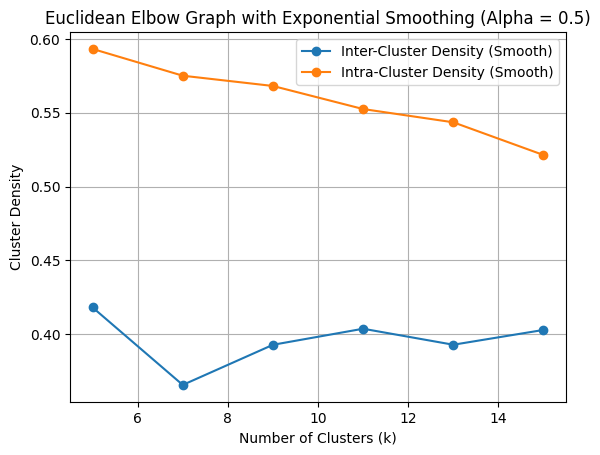

In [ ]:
euclidean_distance_measure = (euclidean_df['Distance_Measure'] == 'Euclidean')
# Filter the DataFrame based on the condition
euclidean = euclidean_df[euclidean_distance_measure].copy()    # we made a copy to avoid any changes in the original dataframe

# display(euclidean_df)

# Specify the smoothing factor (alpha)
alpha = 0.5

# Apply exponential smoothing to 'inter' and 'intra' columns
euclidean['intra_smooth'] = euclidean['intra'].ewm(alpha=alpha, adjust=False).mean()
euclidean['inter_smooth'] = euclidean['inter'].ewm(alpha=alpha, adjust=False).mean()

display(euclidean)

# Plot k_value on x-axis vs inter and intra cluster density on y-axis
plt.plot(euclidean['k_Value'], euclidean['inter_smooth'], marker='o', label='Inter-Cluster Density (Smooth)')
plt.plot(euclidean['k_Value'], euclidean['intra_smooth'], marker='o', label='Intra-Cluster Density (Smooth)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cluster Density')
plt.title('Euclidean Elbow Graph with Exponential Smoothing (Alpha = {})'.format(alpha))
plt.legend()
plt.grid(True)
plt.show()

In this section, we will analyze the resulting plots of the Euclidean distance measure. Even after smoothening our Euclidean elbow plot, we didn't reach a clear elbow shape either with increasing or decreasing angle, this could be due to the noises in our dataset so it may need preprocessing and EDA. Thus this highlights a drawback of Apache mahout that it doesn't support data preprocessing and EDA functionalities, it mainly focuses on providing scalable machine learning algorithms like k-means clustering, for further big data analysis on the preprocessed data. However, we can work around this limitation by performing data preprocessing and EDA using other tools before feeding the prepared data into Apache Mahout for model training but this will be beyond our report's scope and main target to get familiar with Mahout and its capabilities.


Additionally, the lack of a clear elbow shape in the Euclidean method may be due to the way it computes the distance between the clusters (inter-cluster distance) and the distance between each data point and the centroid within the same cluster (intra-cluster distance), which might not be efficient for our dataset.

As we can see from the above graph, in the case of inter-cluster density, when the k increases the inter-cluster density is almost constant. In contrast, the intra-cluster density decreases when the k increases which does not serve our aim, of maximizing the intra-cluster density and minimizing the inter-cluster density. The highest values of intra-cluster densities are when k=5 and k=7, however, the inter-cluster density when k=7 is lower than the inter-cluster density when k=5. We would always prefer simpler models with lower k values with a trade-off for a bit of inter-cluster density as our main goal is to maximize the intra-cluster density which is true at k=5. We would choose the highest intra-cluster value and lowest k value as a trade-off for a small difference in the inter-cluster density. Thus choosing k=5 instead of k=7 for our dataset using Euclidean as a distance measure.

####3.2.2 Manhattan Method

,Distance_Measure,k_Value,t1,t2,x (iterations),intra,inter,intra_smooth,inter_smooth
0,Manhattan,5,1,0.5,25,0.552454,0.442137,0.552454,0.442137
1,Manhattan,7,1,0.5,25,0.508019,0.505227,0.530237,0.473682
2,Manhattan,9,1,0.5,25,0.549218,0.359103,0.539727,0.416393
3,Manhattan,11,1,0.5,25,0.516751,0.473946,0.528239,0.445169
4,Manhattan,13,1,0.5,25,0.551925,0.545091,0.540082,0.495130
5,Manhattan,15,1,0.5,25,0.575147,0.359993,0.557615,0.427562


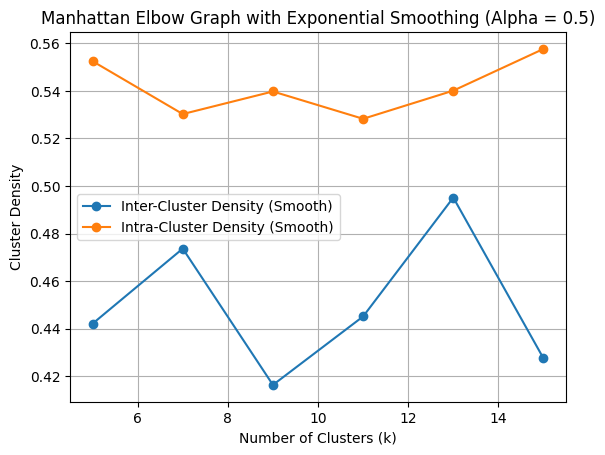

In [ ]:
manhattan_distance_measure = (manhattan_df['Distance_Measure'] == 'Manhattan')

# Filter the DataFrame based on the condition
manhattan = manhattan_df[manhattan_distance_measure].copy()

# display(manhattan_df)

# Specify the smoothing factor (alpha)
alpha = 0.5

# Apply exponential smoothing to 'inter' and 'intra' columns using .loc
manhattan['intra_smooth'] = manhattan['intra'].ewm(alpha=alpha, adjust=False).mean()
manhattan['inter_smooth'] = manhattan['inter'].ewm(alpha=alpha, adjust=False).mean()

display(manhattan)

# Plot k_value on x-axis vs inter and intra cluster density on y-axis
plt.plot(manhattan['k_Value'], manhattan['inter_smooth'], marker='o', label='Inter-Cluster Density (Smooth)')
plt.plot(manhattan['k_Value'], manhattan['intra_smooth'], marker='o', label='Intra-Cluster Density (Smooth)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cluster Density')
plt.title('Manhattan Elbow Graph with Exponential Smoothing (Alpha = {})'.format(alpha))
plt.legend()
plt.grid(True)
plt.show()

The Manhattan elbow graph lacks a distinct elbow shape like the Euclidean graph, highlighting the necessity for data preprocessing and EDA to tackle the noise problem. Or it might be attributed to the way it calculates inter and intra cluster distance, which might not be optimized in our case.

 We may notice that at k=15, the intra-cluster density has the highest value and a very low inter-cluster density, however, this could be an outlier leading to an overfitted model. Moreover, we always prioritize simpler models that have a lower k value, even if it means compromising on a slight variation in the intra-cluster density, and in our case the difference is 0.022693 which is relatively small. Therefore, k=5 is a potentially suitable choice for our dataset when using the Manhattan distance measure.

####3.2.3 Cosine Method

,Distance_Measure,k_Value,t1,t2,x (iterations),intra,inter,inter_smooth,intra_smooth
0,Cosine,5,0.6,0.3,25,0.600476,0.404413,0.404413,0.600476
1,Cosine,7,0.6,0.3,25,0.596499,0.610662,0.507538,0.598487
2,Cosine,9,0.6,0.3,25,0.550665,0.366151,0.436844,0.574576
3,Cosine,11,0.6,0.3,25,0.605760,0.287312,0.362078,0.590168
4,Cosine,13,0.6,0.3,25,0.538975,0.372558,0.367318,0.564572
5,Cosine,15,0.6,0.3,25,0.530574,0.280462,0.323890,0.547573


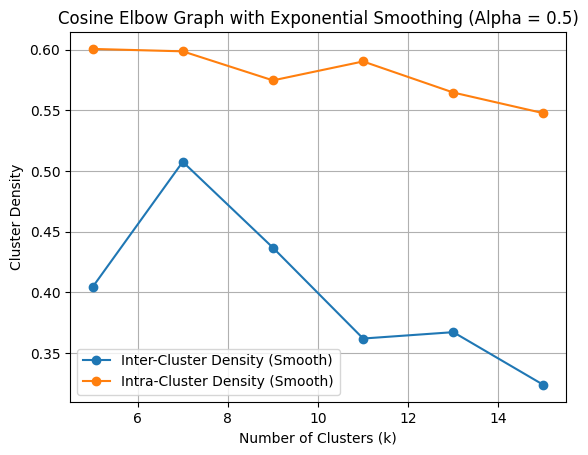

In [ ]:
cosine_distance_measure = (cosine_df['Distance_Measure'] == 'Cosine')

# Filter the DataFrame based on the condition
cosine = cosine_df[cosine_distance_measure].copy()

# display(cosine_df)

# Specify the smoothing factor (alpha)
alpha = 0.5

# Apply exponential smoothing to 'inter' and 'intra' columns using .loc
cosine['inter_smooth'] = cosine['inter'].ewm(alpha=alpha, adjust=False).mean()
cosine['intra_smooth'] = cosine['intra'].ewm(alpha=alpha, adjust=False).mean()

display(cosine)

# Plot k_value on x-axis vs inter and intra cluster density on y-axis
plt.plot(cosine['k_Value'], cosine['inter_smooth'], marker='o', label='Inter-Cluster Density (Smooth)')
plt.plot(cosine['k_Value'], cosine['intra_smooth'], marker='o', label='Intra-Cluster Density (Smooth)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cluster Density')
plt.title('Cosine Elbow Graph with Exponential Smoothing (Alpha = {})'.format(alpha))
plt.legend()
plt.grid(True)
plt.show()

The case might be better a little bit when using the cosine method compared to the previous two methods as there is a potential elbow shape with a gradual shift in the trend of inter-cluster density as the k values increase, a slightly decreasing angle.

 However, at this elbow point where k=11, the model's complexity is relatively high due to the larger k value and the model's performance is not optimal as the intra-cluster density could be higher. Therefore, k=5 could be our choice for the optimal number of clusters for this dataset using the Cosine distance as it has the highest intra-cluster density value, relatively low inter-cluster density, and most importantly the lowest k value leading to a simple model.

###4. Conslusion

####4.1 Comparison and Evaluation

We performed Mahout K-Means clustering on our dataset using three distance measures Euclidean, Manhattan, and Cosine, aiming to determine the best setting for K-Means clustering for our dataset with the help of intra and inter cluster densities metrics to represent elbow plots. In the ideal world, we can have a good shape of elbow graph by seeing a clear angle either increasing or decreasing, however, in real life the data has very high dimensions and noises indicating the need for data preprocessing and EDA. Regarding our case, the elbow plots obtained from the intra and inter cluster densities metrics did not show a sharp elbow shape even after applying exponential smoothening, especially for Euclidean and Manhattan distance measures which may be attributed to the noise in the dataset or suboptimal distance calculation methods. The analysis revealed that the above two methods at k=5 achieved the highest intra-cluster density where Euclidean's value=0.593159 and Manhattan's value=0.552454 considering the model's simplicity. Although, the cosine distance method showed a higher value at k=5 for intra-cluster density which is 0.600476, and the lowest inter-cluster density compared to the previous two methods which is 0.404413.

In conclusion, further improvements could be achieved through data preprocessing and EDA to handle noise and enhance the performance of the clustering algorithm on our dataset. Additionally, applying hyperparameter tuning techniques could potentially lead to even better elbow shapes in the future. Nonetheless, considering the trade-offs between intra-cluster and inter-cluster densities, as well as the model's complexity represented by the chosen K value, we could be able to reach that Cosine distance measure with k=5 is the best set of parameters for K-Means clustering for this dataset.


####4.2 Summary and Conclusions


In this report, we have implemented mappers and reducers using MapReduce on the Hadoop cluster to find some descriptive statistics. In the second part, we converted the terms of the documents into numerical feature vectors, and then we performed the K-Means clustering algorithm to cluster similar data points using Euclidean, Manhattan, and Cosine distance measures.

In summary, MapReduce and Hadoop are powerful tools that handle big data and implement parallel processing tasks, but careful consideration should be given to iterative algorithms like k-means clustering, which can be inefficient in MapReduce. This is because MapReduce requires multiple passes through the data, which can result in high computational overhead and slow. Additionally, MapReduce lacks data preprocessing and exploratory analysis functionalities which makes it inappropriate for these kinds of tasks. These drawbacks could be enhanced in newer technologies such as Spark and this might be discovered in our next report.

###5. References

1. Follow, A. (2019) 'Elbow Method for optimal value of k in KMeans', GeeksforGeeks, Available at: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

2. Follow, S. (2020) 'Difference between Hadoop and MapReduce', GeeksforGeeks, Available at: https://www.geeksforgeeks.org/difference-between-hadoop-and-mapreduce/

3. Hayes, A. (2003) 'What is variance in statistics? Definition, formula, and example', Investopedia, Available at: https://www.investopedia.com/terms/v/variance.asp

4. Leskovec, J., Rajaraman, A., & Ullman, J. D. (2014) Mining of Massive Datasets. 3rd ed. Cambridge: Cambridge University Press.

5. Shin, T. (2022) Predicting the future: Time series analysis with simple exponential smoothing in Python, Getcensus.com. Census. Available at: https://www.getcensus.com/blog/predicting-the-future-time-series-analysis-with-simple-exponential-smoothing

6. Shrivastav, A. (2020) 'All you need to know about K-Means Clustering', Available at: https://www.linkedin.com/pulse/all-you-need-know-k-means-clustering-anuj-shrivastav/?fbclid=IwAR0MTxg7_lwu9-JXoR18_xjsWVx82OGUmTkybMCyDYrXIIhYqeIjztXWTkc

7. White, T. (2015) Hadoop: The Definitive Guide. 4th ed. Sebastopol, CA: O'Reilly Media, Inc. ISBN: 9781491901632.


